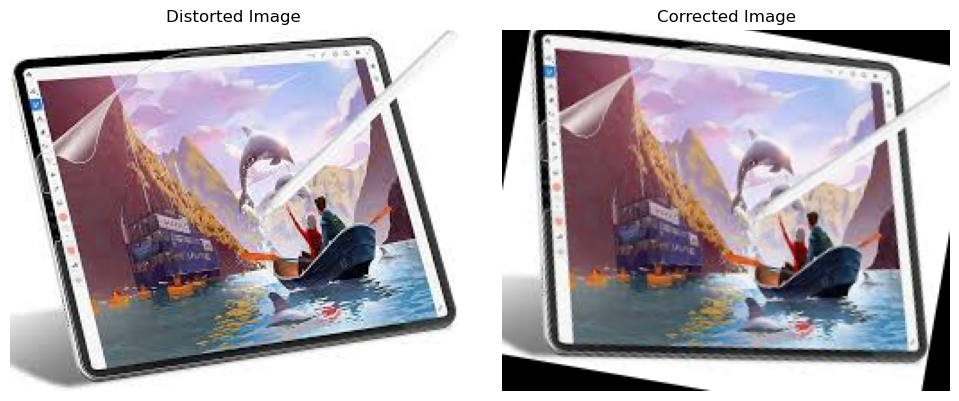

In [143]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the distorted image
distorted_image = cv2.imread('E:/IUT/Computer vision/EX5/2.jpg')

# Specify the angle of rotation
angle = -10  # Adjust this angle as needed

# Get the dimensions of the distorted image
height, width = distorted_image.shape[:2]

# Calculate the rotation matrix
rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), angle, 1)

# Apply the rotation transformation to correct the distortion
corrected_image = cv2.warpAffine(distorted_image, rotation_matrix, (width, height))

# Display the distorted and corrected images using matplotlib
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].imshow(cv2.cvtColor(distorted_image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Distorted Image')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(corrected_image, cv2.COLOR_BGR2RGB))
axes[1].set_title('Corrected Image')
axes[1].axis('off')

plt.tight_layout()
plt.show()

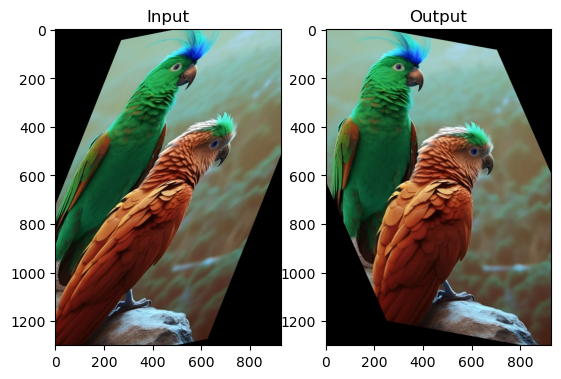

In [151]:
rows,cols,ch = img.shape
pts2 = np.float32([[0,50],[10,420],[120,440]])
pts1 = np.float32([[250,100],[100,500],[200,500]])
M = cv2.getAffineTransform(pts1,pts2)
dst2 = cv2.warpAffine(dst,M,(cols,rows))
plt.subplot(121),plt.imshow(dst),plt.title('Input')
plt.subplot(122),plt.imshow(dst2),plt.title('Output')
plt.show()


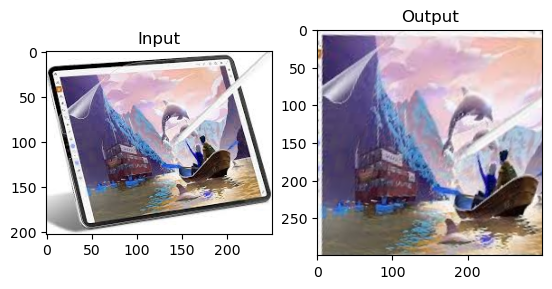

In [139]:
img = cv2.imread('E:/IUT/Computer vision/EX5/2.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"
rows,cols,ch = img.shape
pts1 = np.float32([[10,25],[200,10],[50,190],[250,160]])
pts2 = np.float32([[0,0],[350,0],[0,302],[350,302]])
M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(img,M,(300,300))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()


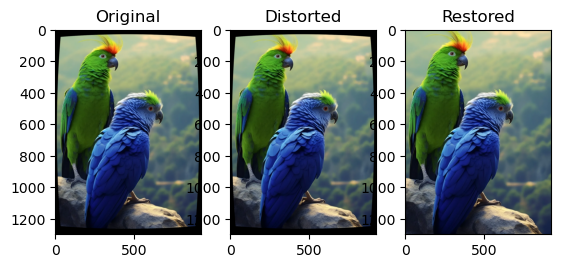

In [174]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
img = cv2.imread('E:/IUT/Computer vision/EX5/1.jpg')

# Define the distortion parameters
k1 = 0.1
k2 = 0.05

# Get the image size
rows, cols, _ = img.shape

# Generate the camera matrix
focal_length = cols  # Assume the focal length is equal to the image width
center = (cols // 2, rows // 2)  # Assume the principal point is at the image center
camera_matrix = np.array([[focal_length, 0, center[0]],
                          [0, focal_length, center[1]],
                          [0, 0, 1]], dtype=np.float32)

# Generate the distortion coefficients
dist_coeffs = np.array([k1, k2, 0, 0, 0], dtype=np.float32)

# Apply distortion
distorted_img = cv2.undistort(img, camera_matrix, dist_coeffs)

# Restore the image to normal
restored_img = cv2.undistort(distorted_img, camera_matrix, np.zeros(5))

# Visualize the imagesimg
plt.subplot(131), plt.imshow(restored_img[:, :, ::-1]), plt.title('Original')
plt.subplot(132), plt.imshow(distorted_img[:, :, ::-1]), plt.title('Distorted')
plt.subplot(133), plt.imshow(img[:, :, ::-1]), plt.title('Restored')
plt.show()

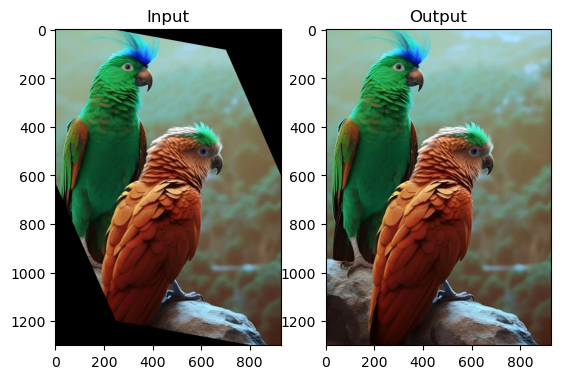

In [177]:
plt.subplot(121),plt.imshow(dst2),plt.title('Input')
plt.subplot(122),plt.imshow(img),plt.title('Output')
plt.show()


In [193]:
import cv2
import numpy as np

# Load the image of the rabbit
image = cv2.imread('')

# Set the amplitude and frequency of the shaking motion
amplitude = 300
frequency = 1

# Create a video writer to save the output
output_filename = 'output.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
fps = 25
output = cv2.VideoWriter(output_filename, fourcc, fps, (image.shape[1], image.shape[0]))

# Generate the shaking motion
for i in range(100):
    # Clear the frame
    frame = np.copy(image)

    # Update the position of the rabbit based on the shaking motion
    offset_x = int(amplitude * np.sin(2 * np.pi * frequency * i / fps))
    offset_y = int(amplitude * np.cos(2 * np.pi * frequency * i / fps))

    # Create a transformation matrix for the shaking motion
    M = np.float32([[1, 0, offset_x], [0, 1, offset_y]])

    # Apply the transformation to the rabbit image
    frame = cv2.warpAffine(frame, M, (frame.shape[1], frame.shape[0]))

    # Write the frame to the output video
    output.write(frame)

# Release the video writer and close the output file
output.release()

In [202]:
import cv2
import numpy as np

# Load the image of the rabbit
image = cv2.imread('E:/IUT/Computer vision/EX5/rabbit.jpg')

# Set the initial position of the rabbit
x = 10
y = 10

# Set the amplitude and frequency of the shaking motion
amplitude = 80
frequency = 10

# Set the rotation parameters
angle = 0
rotation_speed = 3

# Create a video writer to save the output
output_filename = 'output.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
fps = 25
output = cv2.VideoWriter(output_filename, fourcc, fps, (image.shape[1], image.shape[0]))

# Generate the shaking and rotating motion
for i in range(300):
    # Clear the frame
    frame = np.copy(image)

    # Update the position of the rabbit based on the shaking motion
    offset_x = int(amplitude * np.sin(2 * np.pi * frequency * i / fps))
    offset_y = int(amplitude * np.cos(2 * np.pi * frequency * i / fps))
    x += offset_x
    y += offset_y

    # Rotate the rabbit
    angle += rotation_speed
    rotation_matrix = cv2.getRotationMatrix2D((x, y), angle, 1)
    frame = cv2.warpAffine(frame, rotation_matrix, (frame.shape[1], frame.shape[0]))

    # Draw the rabbit at the updated position
    cv2.circle(frame, (x, y), 20, (0, 255, 0), -1)

    # Write the frame to the output video
    output.write(frame)

# Release the video writer and close the output file
output.release()